<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/machine_learning/kmeans_zoo_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

This exercise explores the application of k-means clustering to a dataset of zoo animals.

The full dataset contains 101 entries, with features as described in the table below.

| # | Attribute name | Attribute values |
|---|---|---|
| 1 | animal name | Unique for each instance |
| 2 | hair | Boolean |
| 3 | feathers | Boolean |
| 4 | eggs | Boolean |
| 5 | milk | Boolean |
| 6 | airborne | Boolean |
| 7 | aquatic | Boolean |
| 8 | predator | Boolean |
| 9 | toothed | Boolean |
| 10 | backbone | Boolean |
| 11 | breathes | Boolean |
| 12 | venomous | Boolean |
| 13 | fins | Boolean |
| 14 | legs | Numeric (set of values {0,2,4,5,6,8}) |
| 15 | tail | Boolean |
| 16 | domestic | Boolean |
| 17 | catsize | Boolean |
| 18 | type | Numeric (integer values in range [1,7]) |

## Imports and theme

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d",
    "light": "#fefeff", "stone": "#8f8f94",
    "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3",
    "yellow": "#e6daaa", "purple": "#9a3792",
    "orange": "#f26251"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

In [ ]:
custom_cmap = ListedColormap([
    palette["red"], palette["blue"], palette["green"],
    palette["yellow"], palette["pink"],
    palette["light"], palette["grey"]
])

## Understand the data

In [ ]:
df = pd.read_csv("zoo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


The dataset contains the details of 101 animals, each with 17 features.

The majority (15) of those features are boolean (e.g., lays eggs or doesn't lay eggs); the exceptions are "animal_name" (e.g. "boar", unique to each animal) and "legs", an integer from 0 to 8.

Finally, each entry is associated with a class_type attribute between 1 and 7, which identifies the animal as belonging to one of the following classes:
1	Mammal,
2	Bird,
3	Reptile,
4	Fish,
5	Amphibian,
6	Bug, and
7	Invertebrate.

## Clean the data

We saw earlier from the df.info() call that there is no missing data in this dataset.

15 of the 17 features are boolean, so should not be subject to concerns of outlier data. Likewise, animal_name is a unique identifier.

The legs category may exhibit outliers, but we will want to scale this feature later on to prevent our model from putting undue weight onto this feature (since the boolean categories will all be either 0 or 1, the model may mistakenly identify number of legs as being more important than it truly is, due to the fact that this number can range from 0 to 8 in our dataset).

For now, we can sum the boolean features to get a sense of how frequent they are within this dataset, and examine the proportion of entries that fall into the legs and class_type bins.

In [ ]:
boolean_df = df.drop(columns=["animal_name", "legs", "class_type"]).copy()
boolean_df.sum()

hair        43
feathers    20
eggs        59
milk        41
airborne    24
aquatic     36
predator    56
toothed     61
backbone    83
breathes    80
venomous     8
fins        17
tail        75
domestic    13
catsize     44
dtype: int64

Above, we can see that the least common features are "venomous" and "domestic", applying to just 8 and 13 of the 101 animals, respectively. The most common features are "backbone", "breathes" and "tail", applying to 83, 80, and 75 of the animals in the dataset.

In [ ]:
class_counts = df.groupby("class_type").size()
class_counts

class_type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64

Mammals account for close to 41% of the data points, whereas Amphibians and Reptiles account for just around 4% and 5%, respectively. We can anticipate that our models may struggle to correctly identify samples from those classes.

In [ ]:
leg_counts = df.groupby("legs").size()
leg_counts

legs
0    23
2    27
4    38
5     1
6    10
8     2
dtype: int64

With the exception of five- and eight-legged animals in the dataset (starfish, octopus, and scorpion), the legs feature appears to be fairly evenly spread across the dataset. We noted already that we will likely need to scale this feature for further handling; we can review at that stage whether additional measures are needed.

## Remove unused features

As we saw in the K-Nearest Neighbours exercise, removing independent features actually reduced the predictive ability of the KNN model on this dataset.

We will remove only the animal_name feature, since this is not an inherent animal quality.

In [ ]:
model_df = df.drop(columns="animal_name").copy()

## Feature scaling and transformations

As noted above, the "legs" feature is likely to induce errors in its present form: the other features are all boolean, whereas "legs" can take integers from 0 to 8. To handle this, we can scale the legs feature using scikit-learn's scaling methods.

In [ ]:
legs_values = model_df["legs"].values.reshape(-1, 1)
# Instantiate the StandardScaler
scaler = StandardScaler()
# Fit and transform "legs" values
legs_scaled = scaler.fit_transform(legs_values)
# Replace the original "legs" values with the scaled values in your DataFrame
model_df["legs"] = legs_scaled

In [ ]:
model_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,0.572540,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,-1.404435,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,-0.415948,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,1.561027,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,-1.404435,0,0,0,7


## Exploratory data analysis (EDA)

Before preparing our K-Means model, we can select some of the features to plot againt the class_type label, to get a sense of how the data is clustered.

Will will select just a subset of the features, to reduce the number of plots generated.

In [ ]:
# Map class_type y values to animal type
class_type_map = {
    1: "Mammal", 2: "Bird", 3: "Reptile",
    4: "Fish", 5: "Amphibian", 6: "Bug", 7: "Invertebrate"
}

In [ ]:
selected_columns = ["eggs", "aquatic", "venomous", "legs", "class_type"]
subset_df = model_df[selected_columns]

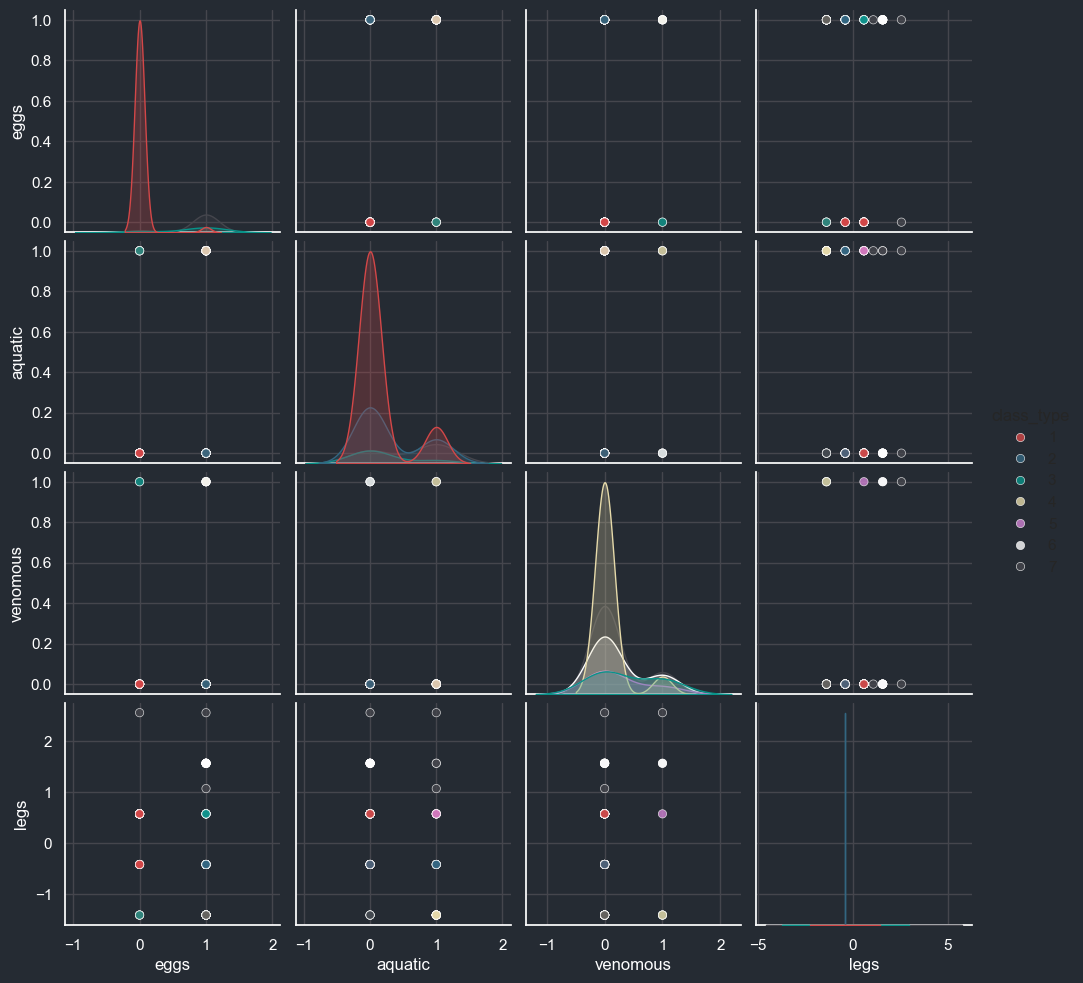

In [ ]:
# Convert custom_cmap to a list of colors
colours_list = [custom_cmap.colors[i] for i in range(custom_cmap.N)]
# Create a pairplot with scatter plots for each feature against the label
sns.pairplot(subset_df, hue="class_type", palette=colours_list, plot_kws={'alpha': 0.8})
plt.show()

The pairplots above depict combinations for just four of the features. However, as in the full feature list, only the "legs" feature is non-binary. We can observe that the binary nature of the features, combined with the fact of there being seven different class types, may make difficult the task of correctly separating the data according to class-type.

## Prepare data for training

Next, we can prepare our data for modelling. Since we already identified that some class_types, such as reptile and amphibian, are underrepresented in the dataset, we accomodate for this by using scikit-learn's "stratify" parameter on the class_type label.

In [ ]:
# Take all remaining features as X values; last column is the target, class_type
X = model_df.iloc[:,:-1].values
y = model_df.class_type.values

## K-means clustering

### Elbow method

The elbow method is applied to determine the optimal number of clusters a model should use, when that number is unknown.

In this case, we know that there are seven classes of animal (mammal, bird, reptile, fish, amphibian, bug, invertebrate), so we will fix our number of clusters at seven.

### K-Means

Scikit-learn's [KMeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) defines parameters for the K-Means model.

In our case, n_clusters is 7 for our number of classes. We will experiment with both of the algorithms provided, the classical Expectation-Maximisation algorithm ("lloyd") and the "Elkan" variation.

An n_init value of "auto" will use the default number of iterations (10). The model will return values based on the most successful of those iterations.

In [ ]:
kmeans_lloyd = KMeans(n_clusters=7, random_state=27, init="k-means++", n_init="auto", algorithm="lloyd")
y_kmeans_lloyd = kmeans_lloyd.fit_predict(X)

In [ ]:
y_kmeans_lloyd

array([3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 3, 2, 5, 4, 6, 6, 2, 3, 5, 1, 2, 2,
       3, 2, 0, 6, 6, 3, 3, 3, 0, 3, 3, 2, 5, 3, 3, 2, 5, 0, 0, 2, 0, 2,
       3, 3, 6, 3, 3, 3, 3, 0, 6, 6, 3, 3, 2, 2, 2, 2, 5, 5, 4, 3, 3, 3,
       1, 3, 3, 3, 3, 2, 0, 5, 1, 1, 5, 4, 2, 2, 4, 4, 5, 2, 3, 6, 5, 2,
       0, 6, 2, 6, 5, 3, 3, 2, 3, 0, 3, 4, 2])

In [ ]:
kmeans_elkan = KMeans(n_clusters=7, random_state=27, init="k-means++", n_init="auto", algorithm="elkan")
y_kmeans_elkan = kmeans_elkan.fit_predict(X)

In [ ]:
y_kmeans_elkan

array([3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 3, 2, 5, 4, 6, 6, 2, 3, 5, 1, 2, 2,
       3, 2, 0, 6, 6, 3, 3, 3, 0, 3, 3, 2, 5, 3, 3, 2, 5, 0, 0, 2, 0, 2,
       3, 3, 6, 3, 3, 3, 3, 0, 6, 6, 3, 3, 2, 2, 2, 2, 5, 5, 4, 3, 3, 3,
       1, 3, 3, 3, 3, 2, 0, 5, 1, 1, 4, 4, 2, 2, 4, 4, 5, 2, 3, 6, 5, 2,
       0, 6, 2, 6, 5, 3, 3, 2, 3, 0, 3, 4, 2])

Reviewing the output of the Lloyd and Elkan algorithms above, their predictions on the training data are similar but not identical. With a larger dataset, we might observe greater variation between the two models.

### Evaluation metrics

Our model is 16-dimensional, so cannot be plotted in its current form. In lieu of plotting, we will examine the model metrics to understand its explanatory power.

#### Silhouette Score:

Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
Scores range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
silhouette_avg_lloyd = silhouette_score(X, y_kmeans_lloyd)
silhouette_avg_elkan = silhouette_score(X, y_kmeans_elkan)
print(f"Silhouette Score - Lloyd: {silhouette_avg_lloyd:.5f}")
print(f"Silhouette Score - Elkan: {silhouette_avg_elkan:.5f}")

Silhouette Score - Lloyd: 0.42204
Silhouette Score - Elkan: 0.42199


Our scores are well into the positive range, but still far from ideal.

The Lloyd algorithm has performed slightly better than the Elkan algorithm, though the difference is negligible.

## K-means clustering with principal component analysis (PCA)

We will apply PCA to reduce the dimensionality of our dataset to just two features, and plot the results.

In [ ]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
kmeans_pca = KMeans(n_clusters=7, random_state=27, init="k-means++", n_init="auto", algorithm="lloyd")
# kmeans_pca = KMeans(n_clusters=7, random_state=27, init="k-means++", n_init="auto", algorithm="lloyd")
y_kmeans_pca = kmeans_pca.fit_predict(X_2d)

In [ ]:
y_kmeans_pca

array([3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 2, 5, 0, 2, 3, 4, 6, 2, 2,
       3, 2, 0, 5, 5, 1, 3, 1, 0, 3, 1, 2, 4, 3, 3, 2, 4, 0, 0, 2, 0, 2,
       3, 3, 0, 3, 3, 3, 3, 0, 5, 0, 3, 3, 2, 2, 2, 2, 4, 4, 4, 5, 3, 3,
       6, 3, 3, 3, 3, 2, 0, 4, 6, 1, 4, 2, 2, 2, 4, 2, 4, 2, 1, 0, 4, 2,
       0, 5, 5, 5, 4, 1, 3, 2, 1, 0, 3, 2, 2])

In [ ]:
silhouette_avg_pca = silhouette_score(X, y_kmeans_pca)
print(f"Silhouette Score - PCA: {silhouette_avg_pca:.5f}")

Silhouette Score - PCA: 0.32109


Note that PCA has resulted in a worse silhouette score compared with the full 16-dimensional dataset.

### Plot clusters (coloured by cluster)

First, we can plot the results of the PCA K-Means model, assigning a unique colour to each cluster.

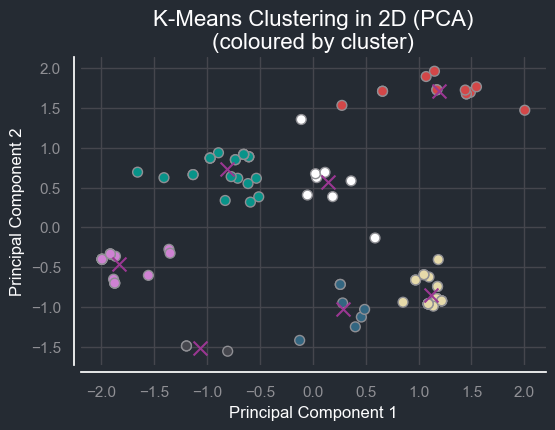

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
# Plot clusters
plt.scatter(X_2d[:, 0],  # 1st component
            X_2d[:, 1],  # 2nd component
            s=50,
            c=y_kmeans_pca,
            cmap=custom_cmap,
            ec=palette["stone"])
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1], s=100, c=palette["purple"], marker="x", label="Centroids")
# Set descriptors
plt.title("K-Means Clustering in 2D (PCA)\n(coloured by cluster)", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Principal Component 1", fontdict={"size": 12, "color": palette["light"]})
plt.ylabel("Principal Component 2", fontdict={"size": 12, "color": palette["light"]})

sns.despine(offset=5)
# Remove ticks from x and y axes (left and bottom)
ax.tick_params(left=False, bottom=False, colors=palette["stone"])

plt.show()

From the plot above, we can observe perhaps 4-5 distinct clusters, though there are many ambiguous datapoints that could just as easily be assigned to neighbouring clusters.

### Plot clusters (coloured by true class_type)

To evaluate how successful our model was in determining the label of each datapoint, we now re-plot the above data, but this time colour each point based on its true class_type.

In [ ]:
# Map class_type y values to animal type
class_type_map = {
    1: "Mammal",
    2: "Bird",
    3: "Reptile",
    4: "Fish",
    5: "Amphibian",
    6: "Bug",
    7: "Invertebrate"
}

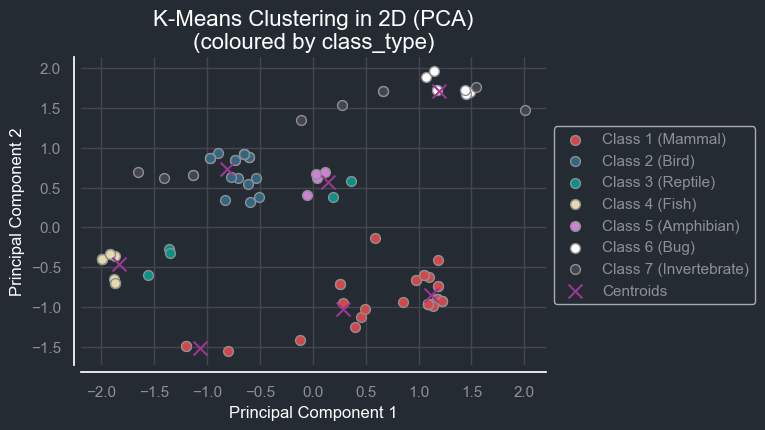

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
# Plot clusters with true class labels and legend labels
for class_label in set(y):
    class_points = X_2d[y == class_label]
    plt.scatter(class_points[:, 0],  # 1st component
                class_points[:, 1],  # 2nd compoentn1
                s=50,
                c=[custom_cmap(class_label - 1)],  # -1 to match indices
                ec=palette["stone"],
                label=f"Class {class_label} ({class_type_map[class_label]})")
# Plot centroids
plt.scatter(kmeans_pca.cluster_centers_[:,0],
            kmeans_pca.cluster_centers_[:,1],
            s=100, c=palette["purple"], marker="x", label="Centroids")
# Set descriptors
plt.title("K-Means Clustering in 2D (PCA)\n(coloured by class_type)", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Principal Component 1", fontdict={"size": 12, "color": palette["light"]})
plt.ylabel("Principal Component 2", fontdict={"size": 12, "color": palette["light"]})

legend = plt.legend(bbox_to_anchor=(1, 0.8))
# Set legend text color
for text in legend.get_texts():
    text.set_color(palette["stone"])

sns.despine(offset=5)
# Remove ticks from x and y axes (left and bottom)
ax.tick_params(left=False, bottom=False, colors=palette["stone"])

plt.show()

This plot suggests that our K-Means algorithm has struggled to correctly cluster the animals in the dataset.

Note that the Mammal (red) class is grouped together, though the large variance within the points has resulted in the data being assigned to three separate clusters that contain no other classes of animal (the bottom three centroids).

Comparing with the cluster-based plot we first generated, we observe that one Mammal record, at approximately (0.5, 0.0) was assigned to the centroid shared by pink and green points, roughly in the center of the plot.

The Bird (blue), Fish (yellow), Amphibian (pink) and Bug (white) animal classes have all been successfully clustered together with one centroid each.

Unfortunately, however, these clusters are shared with points from either the Reptile (green) or Invertebrate (grey) classes.

The algorithm has clearly had difficulty in correctly assigned the Reptile and Invertebrate records, and this has resulted in significant in the correct categorisation of the data.